In [1]:
# setting the environment
import re
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt



from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('data/heart_failure_dataset.csv')

# column names are strangely formated, let's fix them quick
replace_dict = {}

for c in df.columns:
    if c not in replace_dict.keys():
        replace_dict[c] = c.replace(' ', '').replace('.', '')     
                                    
df = df.rename(columns=replace_dict)

# our dependent variable (y)
df['Mortality'] = df['Mortality'].astype('category')

df.head(5)

,Age,AgeGroup,Gender,Locality,Maritalstatus,LifeStyle,Sleep,Category,Depression,Hyperlipi,Smoking,FamilyHistory,FHistory,Diabetes,HTN,Allergies,BP,Thrombolysis,BGR,BUrea,SCr,SSodium,SPotassium,SChloride,CPK,CKMB,ESR,WBC,RBC,Hemoglobin,PCV,MCV,MCH,MCHC,PLATELET_COUNT,NEUTROPHIL,LYMPHO,MONOCYTE,EOSINO,Others,CO,Diagnosis,Hypersensitivity,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,SK,SKReact,Reaction,Mortality,FollowUp
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,NO,NO,0,1,NO,NO,100.6,0,84,28.0,0.9,138,3.3,107,130,30,11,9900,4.26,11.6,0.34,79.7,27.2,0.34,265000,0.70,0.25,0.03,2,no,"Chest pain,",EXT. ACUTE WALL M.I,NO,4,132,341,1,2,136,1,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,NO,NO,0,0,NO,NO,90.6,0,135,17.0,0.7,144,4.7,104,163,30,27,15800,5.74,14.5,0.44,78.0,25.0,0.32,287000,0.73,0.20,0.04,3,no,"Central Chest pain,",A/W M.I,NO,4,130,305,0,0,142,1,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,NO,0,1,YES,NO,100.7,0,146,37.0,1.0,137,4.2,103,149,22,19,7900,4.83,14.1,0.42,87.0,29.0,0.33,183000,0.60,0.33,0.04,3,LV dysfunction,"Chest pain,SOB, Cold sweating",AC I/W M.I (RV) RE. M.I,NO,4,180,327,0,1,117,1,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,NO,0,1,YES,NO,160.1,0,146,37.0,1.0,137,4.2,103,149,22,19,7900,4.83,14.1,0.42,87.0,29.0,0.33,183000,0.60,0.33,0.04,3,HTN,"CENTRAL Chest pain,",I/W M.I,NO,4,128,205,0,1,130,1,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,NO,NO,0,1,YES,NO,90.6,0,85,78.0,1.2,139,4.5,112,75,18,13,6900,4.41,12.3,0.36,82.0,27.0,0.33,211000,0.71,0.25,0.02,2,no,"Chest pain,",A/W M.I,NO,4,200,288,1,2,133,1,4.0,3,2,7,3,1,NO,0,0,34


In [3]:
df.shape

(368, 60)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               368 non-null    int64   
 1   AgeGroup          368 non-null    object  
 2   Gender            368 non-null    object  
 3   Locality          368 non-null    object  
 4   Maritalstatus     368 non-null    object  
 5   LifeStyle         368 non-null    object  
 6   Sleep             368 non-null    object  
 7   Category          368 non-null    object  
 8   Depression        368 non-null    object  
 9   Hyperlipi         368 non-null    object  
 10  Smoking           368 non-null    object  
 11  FamilyHistory     368 non-null    object  
 12  FHistory          368 non-null    int64   
 13  Diabetes          368 non-null    int64   
 14  HTN               368 non-null    object  
 15  Allergies         368 non-null    object  
 16  BP                368 non-

In [5]:
df.isna().sum().sum() # there are no NaN values in the dataset

0

In [7]:
df.duplicated().sum() # seems there is a lot of duplicates

214

In [8]:
# since I am not sure, I will check a few examples
ddf = df.copy()

# Tworzenie pustej kolumny "Index_First_Or_Same"
ddf['OriginalRecord'] = 0

# Iteracja przez wiersze i przypisanie indeksu pierwszego wystąpienia danej kombinacji wartości
seen_combinations = {}
for index, row in df.iterrows():
    combination = tuple(row)
    if combination not in seen_combinations:
        seen_combinations[combination] = index
    ddf.at[index, 'OriginalRecord'] = seen_combinations[combination]

# Wyświetlenie wynikowego DataFrame
ddf[ddf['OriginalRecord'] == 49]

,Age,AgeGroup,Gender,Locality,Maritalstatus,LifeStyle,Sleep,Category,Depression,Hyperlipi,Smoking,FamilyHistory,FHistory,Diabetes,HTN,Allergies,BP,Thrombolysis,BGR,BUrea,SCr,SSodium,SPotassium,SChloride,CPK,CKMB,ESR,WBC,RBC,Hemoglobin,PCV,MCV,MCH,MCHC,PLATELET_COUNT,NEUTROPHIL,LYMPHO,MONOCYTE,EOSINO,Others,CO,Diagnosis,Hypersensitivity,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,SK,SKReact,Reaction,Mortality,FollowUp,OriginalRecord
49,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,NO,NO,0,1,YES,NO,130.9,0,89,26.0,0.8,139,3.9,105,725,85,6,14000,4.53,13.6,0.35,78.1,30.1,0.39,268000,0.69,0.25,0.04,2,"SEIZARIAN, HYSTECTOMY.","Chest pain,VOMITING.,SOB",A/W M.I,NO,3,118,149,0,2,126,0,0.8,1,3,3,1,1,COUGH.BLEEDING,1,0,32,49
213,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,NO,NO,0,1,YES,NO,130.9,0,89,26.0,0.8,139,3.9,105,725,85,6,14000,4.53,13.6,0.35,78.1,30.1,0.39,268000,0.69,0.25,0.04,2,"SEIZARIAN, HYSTECTOMY.","Chest pain,VOMITING.,SOB",A/W M.I,NO,3,118,149,0,2,126,0,0.8,1,3,3,1,1,COUGH.BLEEDING,1,0,32,49
365,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,NO,NO,0,1,YES,NO,130.9,0,89,26.0,0.8,139,3.9,105,725,85,6,14000,4.53,13.6,0.35,78.1,30.1,0.39,268000,0.69,0.25,0.04,2,"SEIZARIAN, HYSTECTOMY.","Chest pain,VOMITING.,SOB",A/W M.I,NO,3,118,149,0,2,126,0,0.8,1,3,3,1,1,COUGH.BLEEDING,1,0,32,49


In [9]:
# seems it's legit, we can drop the duplicates
df = df.drop_duplicates()

In [10]:
df.describe() # now that duplicates are gone, let's see how our data looks

,Age,FHistory,Diabetes,BP,Thrombolysis,BGR,BUrea,SCr,SSodium,SPotassium,SChloride,CPK,CKMB,ESR,WBC,RBC,Hemoglobin,PCV,MCV,MCH,MCHC,PLATELET_COUNT,NEUTROPHIL,LYMPHO,MONOCYTE,EOSINO,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,SK,Reaction,FollowUp
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,55.772727,0.194805,0.409091,118.165779,0.051948,227.948052,47.135714,1.490000,137.987013,4.194805,103.461039,637.694805,69.396104,25.720779,11171.363636,5.115325,13.840260,0.417208,81.033766,27.059740,0.326753,245792.207792,2.294286,0.249026,0.033117,2.214286,3.590909,133.396104,249.448052,0.149351,1.162338,139.993506,0.551948,1.531169,1.818182,1.051948,5.896104,2.032468,0.974026,0.759740,28.902597
std,9.036978,0.397343,0.493270,23.459274,0.222646,141.137804,54.496293,3.079576,3.993437,0.369559,4.628885,1085.768192,100.175233,28.377358,3360.261441,0.775705,2.162319,0.065744,7.304875,3.330735,0.027839,78208.509251,11.413506,0.117366,0.015946,0.877938,0.844928,18.592788,49.913133,0.357597,0.980001,22.523915,0.498917,1.300403,0.565391,1.027671,1.715629,1.012464,0.159577,0.428635,16.567457
min,24.000000,0.000000,0.000000,80.500000,0.000000,60.000000,2.300000,0.600000,129.000000,3.300000,90.000000,52.000000,14.000000,5.000000,5800.000000,3.460000,9.100000,0.290000,60.000000,18.000000,0.220000,20000.000000,0.360000,0.050000,0.010000,1.000000,1.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000
25%,52.000000,0.000000,0.000000,100.625000,0.000000,127.000000,28.000000,0.800000,135.000000,3.900000,100.000000,131.250000,22.000000,11.000000,7900.000000,4.410000,12.300000,0.360000,78.000000,25.000000,0.320000,187000.000000,0.600000,0.170000,0.020000,2.000000,4.000000,120.000000,213.000000,0.000000,0.000000,125.000000,0.000000,0.225000,1.000000,0.000000,3.750000,1.000000,1.000000,1.000000,15.000000
50%,57.000000,0.000000,0.000000,120.700000,0.000000,165.000000,35.500000,0.900000,138.000000,4.200000,104.000000,192.000000,39.000000,16.000000,10400.000000,5.230000,14.100000,0.420000,82.100000,27.800000,0.330000,237000.000000,0.720000,0.210000,0.030000,2.000000,4.000000,130.000000,248.500000,0.000000,2.000000,142.000000,1.000000,1.400000,2.000000,1.000000,7.000000,2.000000,1.000000,1.000000,32.000000
75%,61.000000,0.000000,1.000000,130.800000,0.000000,320.000000,42.000000,1.080000,140.750000,4.400000,106.000000,446.000000,52.000000,27.000000,13800.000000,5.650000,15.500000,0.460000,86.000000,29.000000,0.340000,284000.000000,0.797500,0.320000,0.040000,3.000000,4.000000,143.500000,283.000000,0.000000,2.000000,156.750000,1.000000,2.475000,2.000000,2.000000,7.000000,3.000000,1.000000,1.000000,36.000000
max,77.000000,1.000000,1.000000,190.110000,1.000000,563.000000,394.000000,22.900000,146.000000,5.300000,112.000000,4289.000000,505.000000,154.000000,19590.000000,6.980000,18.000000,0.540000,96.000000,33.000000,0.390000,459000.000000,83.000000,0.540000,0.080000,5.000000,4.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000,1.000000,60.000000


In [11]:
mortality_percentage = df['Mortality'].value_counts(normalize=True) * 100
mortality_percentage

0    82.467532
1    17.532468
Name: Mortality, dtype: float64

In [12]:
def outliers(dataframe, column):
    outliers = []
    q1 = np.percentile(sorted(dataframe[column]), 25)
    q3 = np.percentile(sorted(dataframe[column]), 75)
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    for i in sorted(dataframe[column]): 
        if (i < lwr_bound or i > upr_bound):
            outliers.append(i)
    return outliers, lwr_bound, upr_bound

In [13]:
# let's see how do the outliers look
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
outlier_dict = {}

for c in numeric_columns:
    empty = []
    outlier = outliers(df, c)[0]
    if outlier != empty:
        outlier_dict[c] = outliers(df, c), len(outliers(df, c)[0])
        
print(outlier_dict.keys())
# it seems there is a bit of outliers, but this should be examined by a medical professional
# in my unprofessional opinion with help from google, all of those should slide

dict_keys(['Age', 'FHistory', 'BP', 'Thrombolysis', 'BUrea', 'SCr', 'SPotassium', 'SChloride', 'CPK', 'CKMB', 'ESR', 'MCV', 'MCH', 'MCHC', 'PLATELET_COUNT', 'NEUTROPHIL', 'MONOCYTE', 'EOSINO', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'SK', 'Reaction'])


## Feature encoding

In [14]:
yesno_columns = ['LifeStyle', 'Sleep', 'Depression', 'Hyperlipi', 
                 'Smoking', 'Allergies',  'Hypersensitivity', 'HTN']

yesno_map = {'NO': 0, 'YES': 1}

easy_enc_columns = ['Gender', 'Locality', 'Maritalstatus', 'Category', 'SKReact']

hard_enc_columns = ['Others', 'CO', 'Diagnosis']

In [15]:
df = df.drop(['AgeGroup', 'FamilyHistory'], axis=1)

In [16]:
df[yesno_columns] = df[yesno_columns].replace(yesno_map)

In [17]:
labeler = LabelEncoder() # here we do not need to define anything inside
labels_dict = {}

for column in easy_enc_columns:
    df[column] = labeler.fit_transform(df[column]) # notice that there is no double square bracket
    if column not in labels_dict.keys():
        labels_dict[column] = dict(zip(labeler.transform(labeler.classes_), labeler.classes_)) # create a dictionary

In [18]:
# since Others is a bit messy
df['Others'] = df['Others'].replace(r',\s*|,', ', ', regex=True)

# we will encode the others as per quantity of diseases/states
df['Others'] = df['Others'].apply(lambda x: 0 if x == 'no' else x.count(',') + 1)

In [19]:
# CO is VERY messy, firstly let's change is all to lower case to avoid trouble
df['CO'] = df['CO'].str.lower().str.replace(r'\d', '', regex=True)

# let's remove the numbers, time and prepositions... and chest pain, all have chest pain
df['CO'] = df['CO'].str.lower().str.replace('central', '')
df['CO'] = df['CO'].str.lower().str.replace('chest pain,', '')
df['CO'] = df['CO'].str.lower().str.replace('day', '')
df['CO'] = df['CO'].str.lower().str.replace('to', '')
df['CO'] = df['CO'].str.lower().str.replace('hr', '')
df['CO'] = df['CO'].str.lower().str.replace('for', '')
df['CO'] = df['CO'].str.lower().str.replace('from', '')
df['CO'] = df['CO'].str.lower().str.replace('chest pain', '')
df['CO'] = df['CO'].str.lower().str.strip()

# we will do it similarely as previously
df['CO'] = df['CO'].apply(lambda x: 0 if x == '' else x.count(',') + 1)

In [20]:
'''
When it comes to 'Diagnosis', I do not understand a letter in here
At work, I would ask someone with medical background to group these
Since I am doing this alone, I asked ChatGPT to group these and it distinuished a 5 types:
- myocardial infarctions (MI)
- NSTEMI (Atypical ST elevation during infarction)
- STEMI (ST elevation during infarction)
- other types of heart attacks
- other diagnosis (not cardiac arrest)
Most of these are heart failures (cardiac arrests) but in medical aspects are slighly different
'''

# Let's group it
for diagnosis in df['Diagnosis'].unique():
    if "M.I" in diagnosis or "ACUTE" in diagnosis:
        # myocardial infarctions (MI)
        df.loc[df['Diagnosis'] == diagnosis, 'Diagnosis'] = 1
    elif "NSTEMI" in diagnosis:
        # NSTEMI (Atypical ST elevation during infarction)
        df.loc[df['Diagnosis'] == diagnosis, 'Diagnosis'] = 2
    elif "STEMI" in diagnosis:
        # STEMI (ST elevation during infarction)
        df.loc[df['Diagnosis'] == diagnosis, 'Diagnosis'] = 3
    elif "CARDIOGENIC" in diagnosis or "MR" in diagnosis or "LBBB" in diagnosis:
        # other diagnosis (not cardiac arrest)
        df.loc[df['Diagnosis'] == diagnosis, 'Diagnosis'] = 4
    else:
        # other types of heart attacks
        df.loc[df['Diagnosis'] == diagnosis, 'Diagnosis'] = 5

        
df.head()

,Age,Gender,Locality,Maritalstatus,LifeStyle,Sleep,Category,Depression,Hyperlipi,Smoking,FHistory,Diabetes,HTN,Allergies,BP,Thrombolysis,BGR,BUrea,SCr,SSodium,SPotassium,SChloride,CPK,CKMB,ESR,WBC,RBC,Hemoglobin,PCV,MCV,MCH,MCHC,PLATELET_COUNT,NEUTROPHIL,LYMPHO,MONOCYTE,EOSINO,Others,CO,Diagnosis,Hypersensitivity,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,SK,SKReact,Reaction,Mortality,FollowUp
0,45,0,0,0,0,0,0,1,1,0,0,1,0,0,100.6,0,84,28.0,0.9,138,3.3,107,130,30,11,9900,4.26,11.6,0.34,79.7,27.2,0.34,265000,0.70,0.25,0.03,2,0,0,1,0,4,132,341,1,2,136,1,3.0,2,0,7,2,1,4,0,0,60
1,51,0,1,0,0,0,0,1,1,0,0,0,0,0,90.6,0,135,17.0,0.7,144,4.7,104,163,30,27,15800,5.74,14.5,0.44,78.0,25.0,0.32,287000,0.73,0.20,0.04,3,0,0,1,0,4,130,305,0,0,142,1,1.2,2,0,7,2,1,4,0,0,15
2,55,0,0,0,1,1,0,1,1,0,0,1,1,0,100.7,0,146,37.0,1.0,137,4.2,103,149,22,19,7900,4.83,14.1,0.42,87.0,29.0,0.33,183000,0.60,0.33,0.04,3,1,2,1,0,4,180,327,0,1,117,1,3.4,2,0,3,2,1,4,0,0,6
3,55,0,0,0,1,1,0,1,1,0,0,1,1,0,160.1,0,146,37.0,1.0,137,4.2,103,149,22,19,7900,4.83,14.1,0.42,87.0,29.0,0.33,183000,0.60,0.33,0.04,3,1,0,1,0,4,128,205,0,1,130,1,2.0,2,1,7,3,1,4,0,0,52
4,56,0,0,0,1,0,0,1,1,0,0,1,1,0,90.6,0,85,78.0,1.2,139,4.5,112,75,18,13,6900,4.41,12.3,0.36,82.0,27.0,0.33,211000,0.71,0.25,0.02,2,0,0,1,0,4,200,288,1,2,133,1,4.0,3,2,7,3,1,4,0,0,34


Hurray, we cleaned and encoded the data! 🥳

## PCA

In [21]:
# for PCA we need to scale and center our data
scaler = StandardScaler()

# copying so not to scale all data at once
dff = df.copy() 

# transformation
dff = scaler.fit_transform(dff) 

In [22]:
pca = PCA()
pca.fit(dff)

PCA()

In [46]:
threshold = 0.95

cumulative_var = np.cumsum(pca.explained_variance_ratio_)
cumulative_var

array([0.0866013 , 0.16002711, 0.22126121, 0.27762066, 0.33019283,
       0.38047787, 0.42098216, 0.45892031, 0.49551095, 0.52985757,
       0.56342617, 0.59349912, 0.62224085, 0.64704243, 0.6707756 ,
       0.69329721, 0.71534443, 0.73551615, 0.75458296, 0.77338731,
       0.78958156, 0.80516972, 0.82043112, 0.83464683, 0.8477539 ,
       0.86034336, 0.8720284 , 0.883263  , 0.89385886, 0.90327214,
       0.91250837, 0.92106824, 0.92887381, 0.93654968, 0.94369731,
       0.95068056, 0.95630067, 0.9615694 , 0.96672131, 0.97151234,
       0.97589431, 0.97983569, 0.98324899, 0.98623652, 0.98895419,
       0.9912758 , 0.99315133, 0.9945635 , 0.99582989, 0.9969049 ,
       0.99777418, 0.99861313, 0.9991851 , 0.99966533, 0.9998449 ,
       0.99992025, 0.99997183, 1.        ])

In [47]:
components_number = np.argmax(cumulative_var > threshold)
print(f'Liczba komponentów objaśniających {threshold:.0%} wariancji: {components_number}')

Liczba komponentów objaśniających 95% wariancji: 35


In [48]:
print(f'{pca.explained_variance_ratio_[0]:.2%} wariancji danych zostało zachowane wzdłuż pierwszej głównej składowej,')
print(f'{pca.explained_variance_ratio_[1]:.2%} wariancji danych zostało zachowane wzdłuż drugiej głównej składowej, itd.')

8.66% wariancji danych zostało zachowane wzdłuż pierwszej głównej składowej,
7.34% wariancji danych zostało zachowane wzdłuż drugiej głównej składowej, itd.


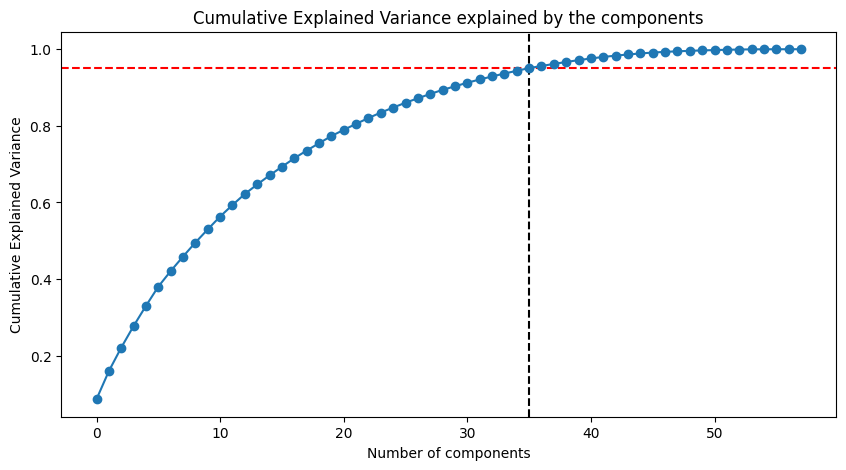

In [49]:
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of components')
plt.axvline(x=components_number, color="k", linestyle="--")
plt.axhline(y=threshold, color="r", linestyle="--")
plt.plot(cumulative_var, marker='o')
plt.show()

In [50]:
df.columns[:36]

Index(['Age', 'Gender', 'Locality', 'Maritalstatus', 'LifeStyle', 'Sleep',
       'Category', 'Depression', 'Hyperlipi', 'Smoking', 'FHistory',
       'Diabetes', 'HTN', 'Allergies', 'BP', 'Thrombolysis', 'BGR', 'BUrea',
       'SCr', 'SSodium', 'SPotassium', 'SChloride', 'CPK', 'CKMB', 'ESR',
       'WBC', 'RBC', 'Hemoglobin', 'PCV', 'MCV', 'MCH', 'MCHC',
       'PLATELET_COUNT', 'NEUTROPHIL', 'LYMPHO', 'MONOCYTE'],
      dtype='object')

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
y = df.pop('Mortality') #dependent variable
X = df[df.columns[:34]] # independent variables

In [96]:
# the basic way with validation set

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=y 
                                                   )

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, # we use train sets in here!
                                                  test_size=0.25,  # remember that X_train = 0.8 of X
                                                  random_state=42,
                                                  stratify=y_train
                                                 )

In [97]:
from sklearn.model_selection import KFold

In [98]:
# kfoldcv = KFold(n_splits=5, # number of folds, 5 is default
#                shuffle=True, # if true, the data is shuffled at the beggining
#                random_state=42 # ensures that when we use it again we will get same results
#                )

# # and the loop is the same for each cross-validation
# for train, test in kfoldcv.split(X, y):
#     X_train, y_train = X.iloc[train], y.iloc[train]
#     X_test, y_test = X.iloc[test], y.iloc[test]
#     print(X_train.shape, X_test.shape)

In [113]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

In [106]:
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average, zero_division = 0)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [119]:
model = xgb.XGBClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)
print_results(calculate_metrics(y_test, y_pred))
y_pred_val = model.predict(X_val_scaled)

Results for classifier
----
  Accuracy:  0.9459459459459459
  Precision: 0.9202586206896552
  Recall:    0.9202586206896552
  F1 score:  0.9202586206896552
  Mislabeled 4 out of 74




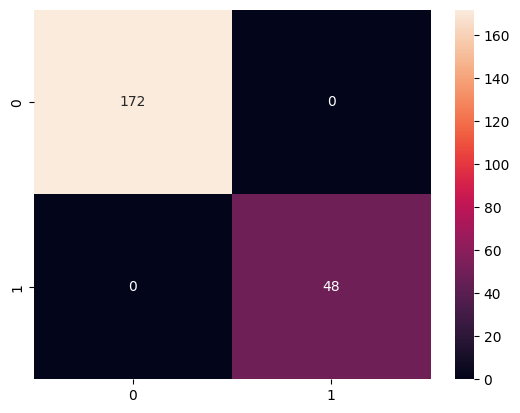

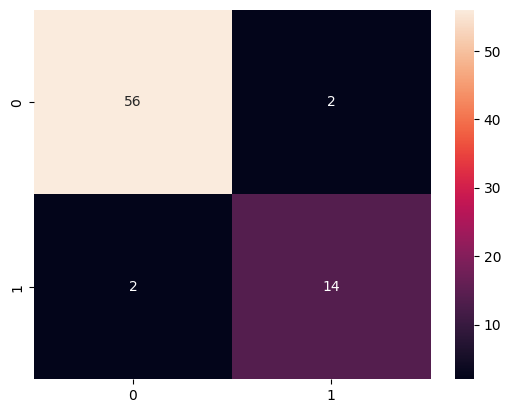

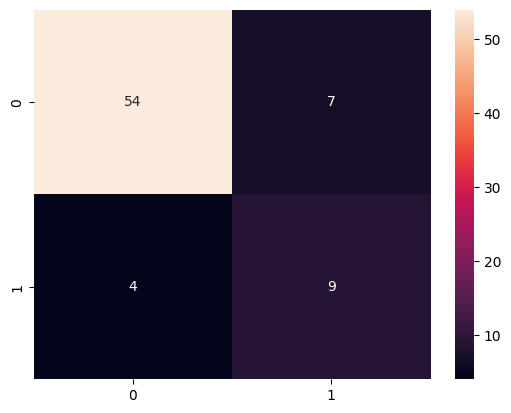

In [120]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)

cm_val = confusion_matrix(y_pred_val, y_val)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm_train, annot = True, fmt = 'd')
plt.show()

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

sns.heatmap(cm_val, annot = True, fmt = 'd')
plt.show()

In [122]:
print_results(calculate_metrics(y_train, y_pred_train))

Results for classifier
----
  Accuracy:  1.0
  Precision: 1.0
  Recall:    1.0
  F1 score:  1.0
  Mislabeled 0 out of 220




In [ ]:
#przetrenuj model z wybranymi hiperparametrami
tree_model=tree.DecisionTreeRegressor(random_state=111,min_samples_split=50,max_depth=9)
tree_model.fit(X_train,y_train)
tree_pred=tree_model.predict(X_test)
mae(y_test,tree_pred)